# Churn Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
churndata = pd.read_csv('data/Telco-Customer-Churn.csv')
churndata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
churndata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
#print("customerID",set(list(churndata['customerID'])))
print("SeniorCitizen",set(list(churndata['SeniorCitizen'])))
print("Partner",set(list(churndata['Partner'])))
print("Dependents",set(list(churndata['Dependents'])))
print("tenure",set(list(churndata['tenure'])))
print("PhoneService",set(list(churndata['PhoneService'])))
print("MultipleLines",set(list(churndata['MultipleLines'])))
print("InternetService",set(list(churndata['InternetService'])))
print("OnlineSecurity",set(list(churndata['OnlineSecurity'])))
print("OnlineBackup",set(list(churndata['OnlineBackup'])))
print("DeviceProtection",set(list(churndata['DeviceProtection'])))
print("TechSupport",set(list(churndata['TechSupport'])))
print("StreamingTV",set(list(churndata['StreamingTV'])))
print("StreamingMovies",set(list(churndata['StreamingMovies'])))
print("Contract",set(list(churndata['Contract'])))
print("PaperlessBilling",set(list(churndata['PaperlessBilling'])))
print("PaymentMethod",set(list(churndata['PaymentMethod'])))
print("Churn",set(list(churndata['Churn'])))

SeniorCitizen {0, 1}
Partner {'No', 'Yes'}
Dependents {'No', 'Yes'}
tenure {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
PhoneService {'No', 'Yes'}
MultipleLines {'Yes', 'No', 'No phone service'}
InternetService {'No', 'Fiber optic', 'DSL'}
OnlineSecurity {'No', 'Yes', 'No internet service'}
OnlineBackup {'No', 'Yes', 'No internet service'}
DeviceProtection {'No', 'Yes', 'No internet service'}
TechSupport {'No', 'Yes', 'No internet service'}
StreamingTV {'No', 'Yes', 'No internet service'}
StreamingMovies {'No', 'Yes', 'No internet service'}
Contract {'Two year', 'One year', 'Month-to-month'}
PaperlessBilling {'No', 'Yes'}
PaymentMethod {'Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check'}
Churn {'No', 'Yes'}


In [5]:
churndata = churndata.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'],1)
churndata

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [6]:
# label encoder
le = LabelEncoder()

churndata['gender'] = le.fit_transform(churndata['gender'])
churndata['Partner'] = le.fit_transform(churndata['Partner'])
churndata['Dependents'] = le.fit_transform(churndata['Dependents'])
churndata['PhoneService'] = le.fit_transform(churndata['PhoneService'])
churndata['PaperlessBilling'] = le.fit_transform(churndata['PaperlessBilling'])
churndata['Churn'] = le.fit_transform(churndata['Churn'])
churndata['MultipleLines'] = le.fit_transform(churndata['MultipleLines'])
churndata['InternetService'] = le.fit_transform(churndata['InternetService'])

churndata['OnlineSecurity'] = le.fit_transform(churndata['OnlineSecurity'])
churndata['OnlineBackup'] = le.fit_transform(churndata['OnlineBackup'])
churndata['DeviceProtection'] = le.fit_transform(churndata['DeviceProtection'])
churndata['TechSupport'] = le.fit_transform(churndata['TechSupport'])
churndata['StreamingTV'] = le.fit_transform(churndata['StreamingTV'])
churndata['StreamingMovies'] = le.fit_transform(churndata['StreamingMovies'])
churndata['Contract'] = le.fit_transform(churndata['Contract'])
churndata['PaymentMethod'] = le.fit_transform(churndata['PaymentMethod'])

churndata

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [7]:
y = to_categorical(churndata["Churn"])
y_ridge = to_categorical(churndata["Churn"]).reshape((-1,1))

standardisation = StandardScaler()  
# Scaled feature 
churndata = standardisation.fit_transform(churndata) 
  
print ("\nAfter Standardisation : \n", churndata) 

X = churndata[:,:-1]
X, y


After Standardisation : 
 [[-1.00955867 -0.43991649  1.03453023 ...  0.8297975   0.39855772
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.20511329  1.33486261
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.8297975   1.33486261
   1.66382851]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.8297975   0.39855772
  -0.60102348]
 [ 0.99053183  2.27315869  1.03453023 ...  0.8297975   1.33486261
   1.66382851]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.8297975  -1.47405205
  -0.60102348]]


(array([[-1.00955867, -0.43991649,  1.03453023, ..., -0.8282069 ,
          0.8297975 ,  0.39855772],
        [ 0.99053183, -0.43991649, -0.96662231, ...,  0.37127103,
         -1.20511329,  1.33486261],
        [ 0.99053183, -0.43991649, -0.96662231, ..., -0.8282069 ,
          0.8297975 ,  1.33486261],
        ...,
        [-1.00955867, -0.43991649,  1.03453023, ..., -0.8282069 ,
          0.8297975 ,  0.39855772],
        [ 0.99053183,  2.27315869,  1.03453023, ..., -0.8282069 ,
          0.8297975 ,  1.33486261],
        [ 0.99053183, -0.43991649, -0.96662231, ...,  1.57074896,
          0.8297975 , -1.47405205]]),
 array([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]], dtype=float32))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
print("X_train", len(X_train))
print("X_test", len(X_test))
print("y_train", len(y_train))
print("y_test", len(y_test))

X_train 5634
X_test 1409
y_train 5634
y_test 1409


In [9]:
#get number of columns in training data
n_cols = X_train.shape[1]

model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # for binary classification

In [10]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4715 - accuracy: 0.7644 - val_loss: 0.4377 - val_accuracy: 0.7782
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.7803 - val_loss: 0.4334 - val_accuracy: 0.7844
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.7817 - val_loss: 0.4333 - val_accuracy: 0.7817
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7877 - val_loss: 0.4328 - val_accuracy: 0.7799
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7932 - val_loss: 0.4362 - val_accuracy: 0.7791
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.7954 - val_loss: 0.4292 - val_accuracy: 0.7764
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.7954 - val_loss: 0.4350 - val_accuracy: 0.7862

Epoch 58/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.9119 - val_loss: 0.9170 - val_accuracy: 0.7462
Epoch 59/100
141/141 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.9126 - val_loss: 0.9001 - val_accuracy: 0.7285
Epoch 60/100
141/141 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9115 - val_loss: 0.9103 - val_accuracy: 0.7400
Epoch 61/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9126 - val_loss: 0.9046 - val_accuracy: 0.7542
Epoch 62/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1840 - accuracy: 0.9101 - val_loss: 0.9366 - val_accuracy: 0.7436
Epoch 63/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9121 - val_loss: 0.9025 - val_accuracy: 0.7471
Epoch 64/100
141/141 [==============================] - 0s 3ms/step - loss: 0.1798 - accuracy: 0.9139 - val_loss: 0.9197 - val_accuracy:

In [11]:
classes = model.predict(X_test, batch_size=128, verbose=1)
classes

12/12 [==============================] - 0s 873us/step


array([[4.0154755e-01, 5.9845245e-01],
       [9.9998093e-01, 1.9072213e-05],
       [9.9999988e-01, 1.1098378e-07],
       ...,
       [9.9904174e-01, 9.5819269e-04],
       [9.9999869e-01, 1.2772391e-06],
       [3.1604007e-01, 6.8395990e-01]], dtype=float32)

In [12]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)
loss_and_metrics

12/12 [==============================] - 0s 967us/step - loss: 0.9327 - accuracy: 0.7537


[0.9326659440994263, 0.753726065158844]

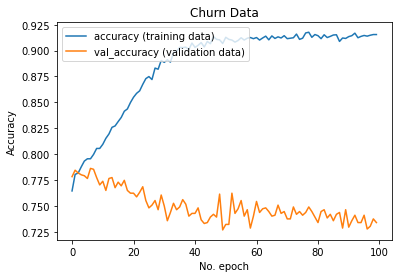

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot history: MAE
plt.plot(history.history['accuracy'], label='accuracy (training data)')
plt.plot(history.history['val_accuracy'], label='val_accuracy (validation data)')
plt.title('Churn Data')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

pred = clf_forest.predict(X_train)
print("Training accuracy", accuracy_score(y_train, pred))

pred_test = clf_forest.predict(X_test)
print("Test accuracy",accuracy_score(y_test, pred_test))

Training accuracy 0.8514376996805112
Test accuracy 0.7877927608232789
